In [1]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Advanced Prompting for ImageGeneration Using Imagen 2

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/generative-ai/vision/use-cases/advanced_prompting_for_imagen2.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fblob%2Fmain%2Fvision%2Fuse-cases%2Fgenerative-ai%2Fvision%2Fuse-cases%2Fadvanced_prompting_for_imagen2.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/generative-ai/vision/use-cases/advanced_prompting_for_imagen2.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/use-cases/generative-ai/vision/use-cases/advanced_prompting_for_imagen2.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>


| | |
|-|-|
|Author(s) | [Abhijat Gupta](https://github.com/abhijat-gupta), [Harish Verma](https://github.com/harishverma8) |

## Overview

### Gemini
Gemini is a family of generative AI models developed by Google DeepMind that is designed for multimodal use cases. The Gemini API gives you access to the Gemini Pro and Gemini Pro Vision models.

### Vertex AI Gemini API
The Vertex AI Gemini API provides a unified interface for interacting with Gemini models. There are two Gemini 1.0 Pro models available in the Gemini API:

**Gemini 1.0 Pro model** (gemini-1.0-pro): Designed to handle natural language tasks, multi-turn text and code chat, and code generation.
**Gemini 1.0 Pro Vision model** (gemini-1.0-pro-vision): Supports multimodal prompts. You can include text, images, and video in your prompt requests and get text or code responses.
You can interact with the Gemini API using the following methods:

- Use [Vertex AI Studio](https://cloud.google.com/generative-ai-studio?hl=en) for quick testing and command generation
- Use cURL commands
- Use the Vertex AI SDK

This notebook focuses on using the Vertex AI SDK for Python to call the Vertex AI Gemini API.

For more information, see the [Generative AI on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/overview) documentation.

## Objective

AI image generation opens a world of visual possibilities, but unleashing its true power requires a touch of finesse. If you're ready to move beyond simple prompts and take creative control, this notebook is for you. We'll explore advanced prompting techniques that will transform the way you generate images with AI.

The notebook demonstrates the usage of Gemini to enhance the prompt, which will then be consumed by Imagen 2. This enhancement will add supporting props and details to the user single liner prompts. We also sometimes want to generate images with a custom set of colors, this notebook helps you to achieve that through prompting. We also, at times, need to include styling to the generated images, like light conditions, lens positioning, people dressing styles, skin-tones, backgrounds, etc., this notebook also enables you provide such custom styles through pure test prompting.

### Prompt Enhancement

Enhance basic one liner prompts using Gemini to create more detailed and complete prompts

### Using Hex color codes in Prompts

We can pass the hex values of the colors that we wish to see in the generated images

- Use `custom_color_palette` flag, set it to `True` if you wish to provide your color palette

### Styling your image with text prompts

- We can pass styles and append it to the original prompt with a **","** (comma)
- Styles can contain of type of people, their dressing, their skin tone, etc.
- Styles can also contain details of the background and environment.
- Example:

    ```
    'your_style_1': {
        'persona': 'people dressed in business casuals with warm toned skin, showing positive charisma and healthy lifestyle',
        'environment': 'saturated, pleasant, true to life, focused'
    }
    ```

## Costs

This tutorial uses the following billable components of Google Cloud:
- Vertex AI (Gemini 1.0 Pro, Imagen 2)

Learn about [Vertex AI Generative AI pricing](https://cloud.google.com/vertex-ai/generative-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Getting Started

### Install Vertex AI SDK for Python

In [2]:
! pip install -q --upgrade google-cloud-aiplatform

## Restart current runtime
To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [3]:
import sys

if "google.colab" in sys.modules:
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-notebooks?hl=en).


In [4]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK
To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://pantheon.corp.google.com/apis/enableflow?apiid=aiplatform.googleapis.com&e=13802955&mods=dm_deploy_from_gcs).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [5]:
PROJECT_ID = "your-project-id"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Default parameters

In [6]:
DEFAULT_STYLE = "no_style"
DEFAULT_PROMPT = "a dog wearing sunglasses on a surfboard"
DEFAULT_ASPECT_RATIO = "1:1"
DEFAULT_ENHANCE_PROMPTING = True
DEFAULT_CUSTOM_COLOR_PALETTE = True
DEFAULT_CUSTOM_COLORS = "[#ED0007]"  # a vibrant and bold shade of red

### Model config

- Providing the current versions for gemini and imagen models.
- Please update this config as per your requirements

In [7]:
GEMINI_MODEL_PRO = "gemini-1.0-pro-001"
VISION_MODEL = "imagegeneration@006"

## Imagen2 configs
ASPECT_RATIOS_OPTIONS = ["1:1", "9:16", "16:9", "3:4", "4:3"]
NUMBER_OF_IMAGES = 4  # Between 0-4
GUIDANCE_SCALE = 90  # Controls the strength of the prompt. Suggested values are:* 0-9 (low strength) * 10-20 (medium strength)* 21+ (high strength)
SEED = 915

### Color palette

Try your own colors. We can pass any hex color code to this palette and see the difference in results.

- `custom_color_palette` parameter in request_json dictionary corresponds to color palette prompting
- It is recommended to put `custom_color_palette` flag as `False` if you want Gemini to enhance the user input.

In [8]:
COLOR_PALETTE_SAMPLES = "[#000000, #FFFFFF, #71767C, #ED0007, #9E2896, #007BC0, #18837E, #00884A, #C535BC, #007BC0, #18837E, #00884A]"

### Example styles

In [9]:
# example styles
STYLES = {
    "no_style": {
        "persona": "people dressed as per the requirement, showing positive charisma and healthy lifestyle",
        "environment": "saturated, true to life, realistic, extremely detailed",
    },
    "corporate": {
        "persona": "people dressed in business casuals with warm toned skin, showing positive charisma and healthy lifestyle",
        "environment": "saturated, pleasant, true to life, focused",
    },
    "healthcare_solutions": {
        "persona": "warm toned people",
        "environment": "more white backgrounds, clean surroundings, realistic, focused, depth of field, blue and turquoise colors",
    },
    "home_appliances": {
        "persona": "warm toned people dressed casually, showing positive charisma and healthy lifestyle",
        "environment": "pastel color backgrounds, realistic, focused, depth of field",
    },
}

### Flag for enhanced prompting

- `enhanced_prompting` parameter in request_json dictionary corresponds to enhanced prompting
- Change it to `False` to stop Gemini enhancement and use the user's input as the prompt for Imagen

### Importing libraries and functions

In [10]:
from typing import Dict
from vertexai.preview.vision_models import ImageGenerationModel
from vertexai.generative_models import GenerativeModel

In [11]:
def parse_json(request_json: Dict[str, str]) -> tuple[str, str, str, bool, bool]:
    """Parses JSON request from user."""
    style = STYLES.get(request_json.get("style"), DEFAULT_STYLE)
    user_prompt = request_json.get("prompt", DEFAULT_PROMPT)
    aspect_ratio_provided = request_json.get("aspect_ratio", DEFAULT_ASPECT_RATIO)
    enhanced_prompting = request_json.get(
        "enhanced_prompting", DEFAULT_ENHANCE_PROMPTING
    )
    custom_color_palette = request_json.get(
        "custom_color_palette", DEFAULT_CUSTOM_COLOR_PALETTE
    )
    color_palettes = request_json.get("color_palette", DEFAULT_CUSTOM_COLORS)

    return (
        style,
        user_prompt,
        aspect_ratio_provided,
        enhanced_prompting,
        custom_color_palette,
        color_palettes,
    )


def generate_enhanced_prompt(
    user_prompt: str, custom_color_palette: bool, COLOR_PALETTE: str
) -> str:
    """Generates enhanced prompt using text LLMs."""
    if custom_color_palette:
        prompt_for_imagen = f"""{prompt_prefix}
                - Color palette : {COLOR_PALETTE}
        Prompt:
        """
    else:
        prompt_for_imagen = f"""{prompt_prefix}
        Prompt:
        """
    print(f"Gemini Prompt provided to enhance: \n\n{prompt_for_imagen}")

    # Generate Imagen prompt using gemini-pro model
    gemini = GenerativeModel(GEMINI_MODEL_PRO)

    img_gen_prompt_gemini = gemini.generate_content(
        prompt_for_imagen,
    )
    return img_gen_prompt_gemini.text


def generate_images(
    gemini_prompt: str, aspect_ratio_provided: str
) -> vertexai.preview.vision_models.ImageGenerationResponse:
    """Generates images using imagen@006."""
    image_model = ImageGenerationModel.from_pretrained(VISION_MODEL)

    prompt = gemini_prompt

    images = image_model.generate_images(
        prompt=prompt,
        number_of_images=NUMBER_OF_IMAGES,
        guidance_scale=GUIDANCE_SCALE,
        aspect_ratio=aspect_ratio_provided,
        # You can't use a seed value and watermark at the same time.
        add_watermark=False,
        seed=SEED,
    )
    return images

### Request
 JSON request with all the required parameters which can come from a user

In [33]:
### Provide your input details here
request_json = {
    "style": "corporate",
    "prompt": "A happy woman in the kitchen working with a mixer",
    "aspect_ratio": "9:16",
    "enhanced_prompting": True,
    "custom_color_palette": False,
    "color_palette": "[#00884A]",
}

In [34]:
(
    style,
    user_prompt,
    aspect_ratio_provided,
    enhanced_prompting,
    custom_color_palette,
    color_palettes,
) = parse_json(request_json)

print(
    f"############  USER PROVIDED REQUEST  ############\nSTYLE = {style}\nASPECT RATIO = {aspect_ratio_provided}\nUSER PROMPT = {user_prompt}"
)
print(f"Enhanced Prompting = {enhanced_prompting}")
if custom_color_palette:
    print(f"Custom Color Palette = {custom_color_palette}")
    print(f"Color Palette provided  = {color_palettes}\n")
else:
    print(f"Custom Color Palette = {custom_color_palette}\n")

############  USER PROVIDED REQUEST  ############
STYLE = {'persona': 'people dressed in business casuals with warm toned skin, showing positive charisma and healthy lifestyle', 'environment': 'saturated, pleasant, true to life, focused'}
ASPECT RATIO = 9:16
USER PROMPT = A happy woman in the kitchen working with a mixer
Enhanced Prompting = True
Custom Color Palette = False



### Prompt prefix

In [35]:
prompt_prefix = f"""You are an expert in writing prompts for image generation model and have immense knowledge of photography, based on user_prompt and settings, generate a 150 words prompt adding supporting props to the image subject, but do NOT add too much information, keep it on the simpler side. Add "a photo of" prefix to every prompt.
                Use below settings for generating the image:
                - Persona: {style["persona"]}
                - Environment: {style["environment"]}
                - Scenario: {user_prompt}"""

In [36]:
if enhanced_prompting:
    gemini_prompt = generate_enhanced_prompt(
        user_prompt, custom_color_palette, color_palettes
    )
    print(f"Enhanced Prompt generated by Gemini: \n\n{gemini_prompt}")
    final_imagen_prompt = gemini_prompt
else:
    if custom_color_palette:
        prompt_for_imagen_1 = f"""A photo of \
            - Persona: {style["persona"]}
            - Environment: {style["environment"]}
            - Scenario: {user_prompt}
            - Color palette : {color_palettes}"""
        final_imagen_prompt = prompt_for_imagen_1
    else:
        prompt_for_imagen_2 = f"""A photo of \
            - Persona: {style["persona"]}
            - Environment: {style["environment"]}
            - Scenario: {user_prompt}"""
        final_imagen_prompt = prompt_for_imagen_2

Gemini Prompt provided to enhance: 

You are an expert in writing prompts for image generation model and have immense knowledge of photography, based on user_prompt and settings, generate a 150 words prompt adding supporting props to the image subject, but do NOT add too much information, keep it on the simpler side. Add "a photo of" prefix to every prompt.
                Use below settings for generating the image:
                - Persona: people dressed in business casuals with warm toned skin, showing positive charisma and healthy lifestyle
                - Environment: saturated, pleasant, true to life, focused
                - Scenario: A happy woman in the kitchen working with a mixer
        Prompt:
        
Enhanced Prompt generated by Gemini: 

A photo of a smiling woman holding a mixer on a kitchen counter with warm-toned skin and positive charisma, wearing business casuals and has healthy lifestyle


In [37]:
print("Imagen Prompt: \n", final_imagen_prompt)

Imagen Prompt: 
 A photo of a smiling woman holding a mixer on a kitchen counter with warm-toned skin and positive charisma, wearing business casuals and has healthy lifestyle


In [38]:
results = generate_images(final_imagen_prompt, aspect_ratio_provided)

## View generated images

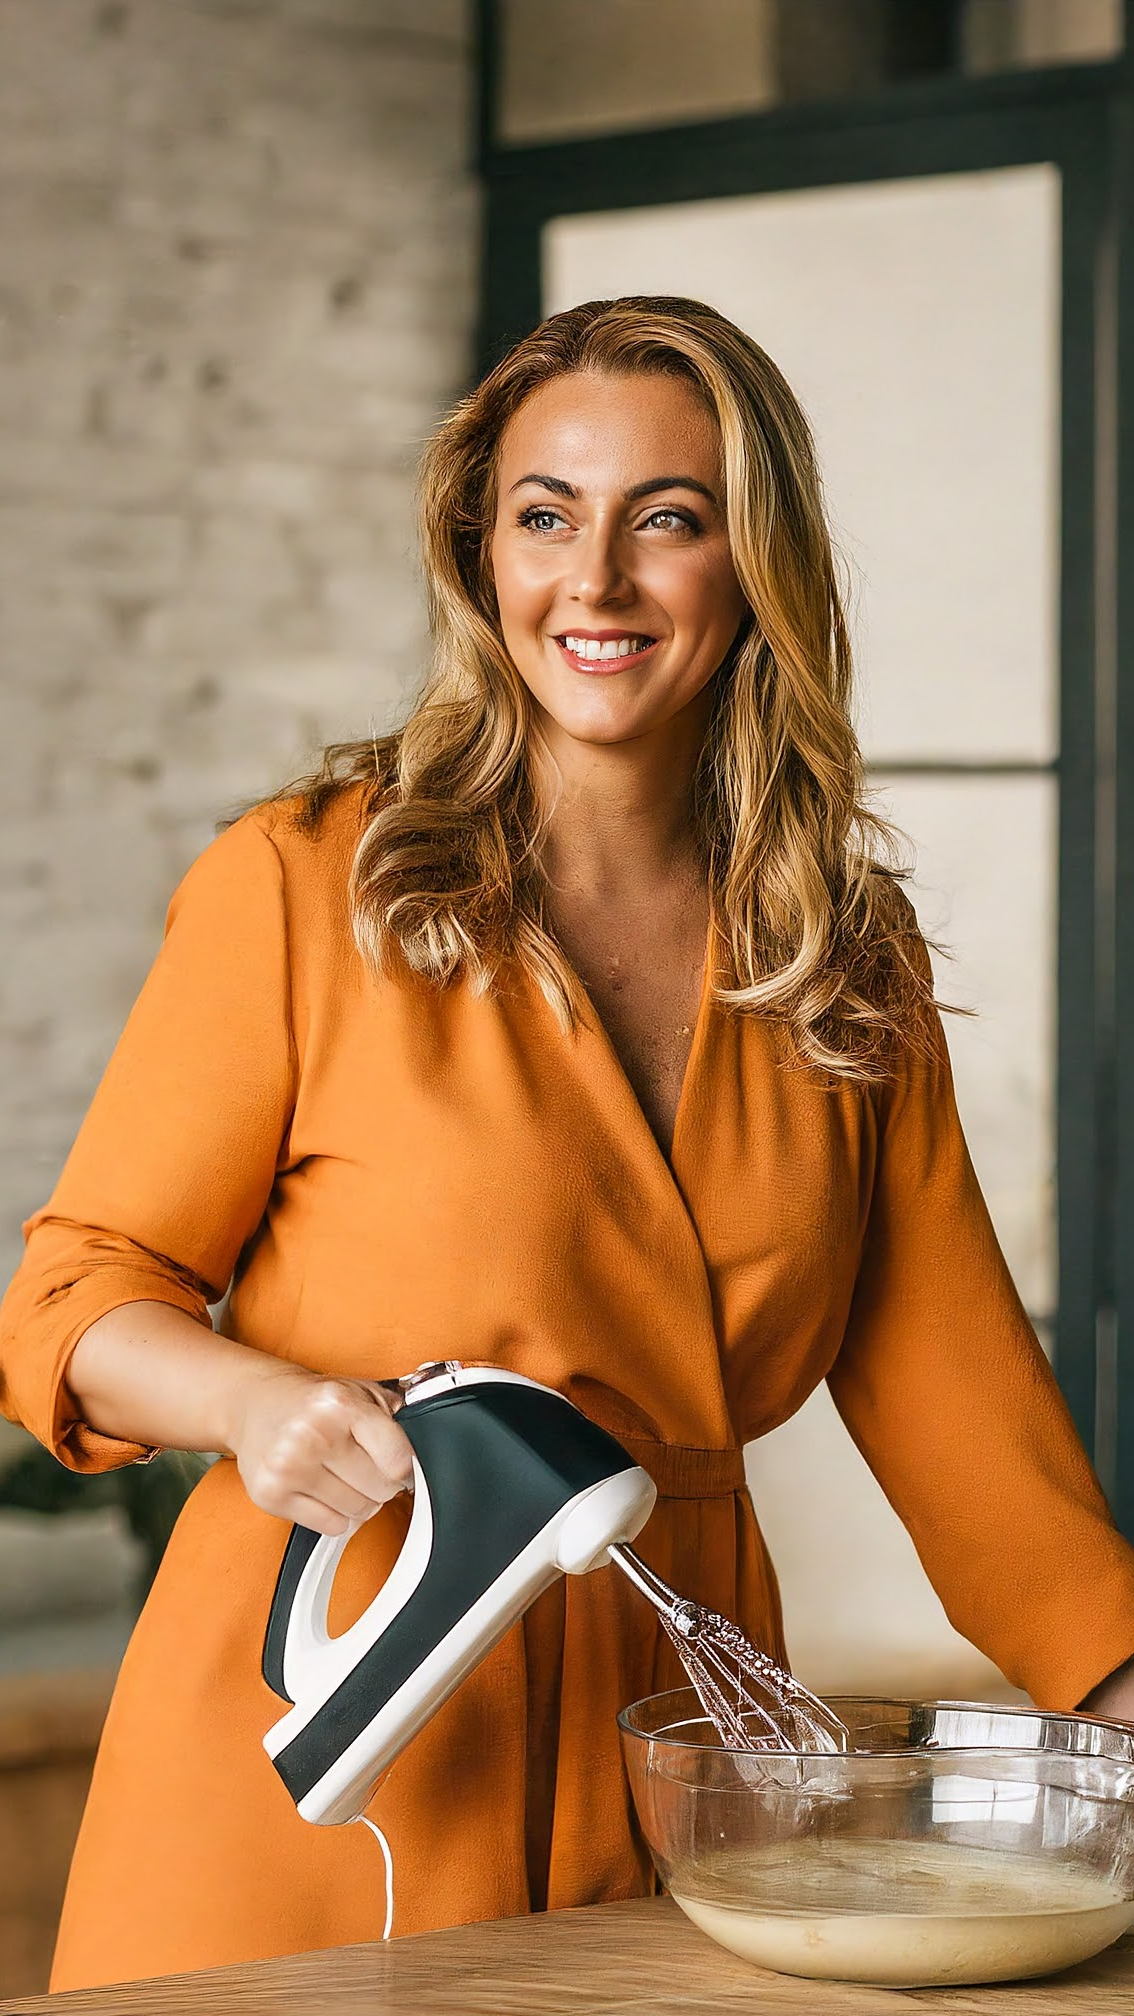

In [39]:
for result in results:
    result.show()
    break